In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('PUMA_Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
new_data= df.drop('Outcome', axis=1)
df_feat=pd.DataFrame(new_data, columns= df.columns[:-1])
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
X= df_feat
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(pred)

[1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 1]


In [5]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[122  28]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       150
           1       0.60      0.52      0.56        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



In [6]:
error_rate = []
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test))
    

Text(0, 0.5, 'ErrorRate')

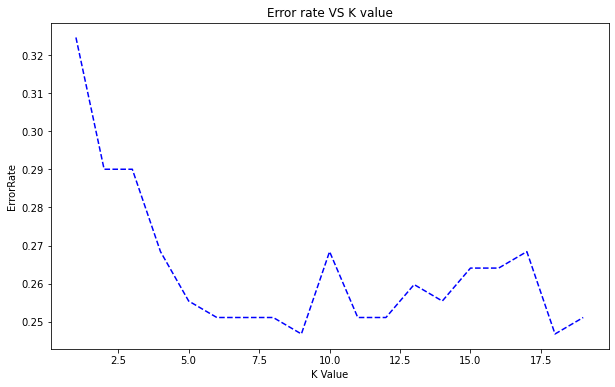

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, color ='blue', linestyle = 'dashed')
plt.title('Error rate VS K value')
plt.xlabel('K Value')
plt.ylabel('ErrorRate')

In [8]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred =knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
 

[[126  24]
 [ 33  48]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       150
           1       0.67      0.59      0.63        81

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

